In [10]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

In [11]:
# cats = 1, not cats = 0. 37 total cats
Y = np.loadtxt('class_labels.csv')
Y = keras.utils.to_categorical(Y)
Y.shape

(100, 2)

In [18]:
def grab_image(img_path, size):
    # 100x100px
    img = image.load_img(img_path, target_size=(size, size))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x
X = np.concatenate([grab_image('/images/image_%d.JPEG'%(i), 100) for i in range(100)])
X.shape

(100, 100, 100, 3)

In [13]:
# build CNN
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(8, 8),
activation='relu',
input_shape=[X.shape[1],
X.shape[2],
X.shape[3]]))
model.add(keras.layers.Conv2D(32, (8, 8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(8, 8)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),
metrics=['accuracy'])
# Roughly the same number of parameters!
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 93, 93, 16)        3088      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 86, 86, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                102432    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
__________

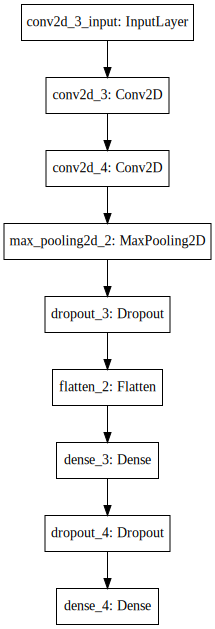

In [14]:
SVG(model_to_dot(model).create(prog = 'dot', format = 'svg'))

In [15]:
# training
batch_size = 20
epochs = 25
history = model.fit(X, Y, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/25
100/100 [==============================] - 18s 182ms/step - loss: 0.7970 - acc: 0.5700
Epoch 2/25
100/100 [==============================] - 7s 74ms/step - loss: 0.6694 - acc: 0.5200
Epoch 3/25
100/100 [==============================] - 7s 71ms/step - loss: 0.6559 - acc: 0.6000
Epoch 4/25
100/100 [==============================] - 6s 63ms/step - loss: 0.6457 - acc: 0.6300
Epoch 5/25
100/100 [==============================] - 6s 63ms/step - loss: 0.6235 - acc: 0.6200
Epoch 6/25
100/100 [==============================] - 9s 94ms/step - loss: 0.6261 - acc: 0.6300
Epoch 7/25
100/100 [==============================] - 7s 73ms/step - loss: 0.6132 - acc: 0.6200
Epoch 8/25
100/100 [==============================] - 7s 73ms/step - loss: 0.5969 - acc: 0.6300
Epoch 9/25
100/100 [==============================] - 7s 70ms/step - loss: 0.5760 - acc: 0.7100
Epoch 10/25
100/100 [==============================] - 7s 69ms/step - loss: 0.5574 - acc: 0.7400
Epoch 11/25
100/100 [================

In [16]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

100/100 [==============================] - 2s 23ms/step
Test loss: 0.022699710577726365
Test accuracy: 1.0


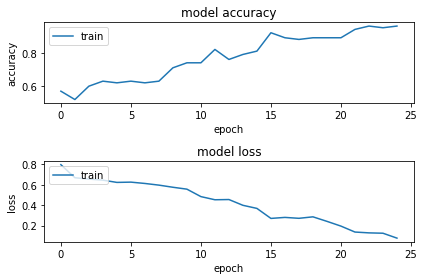

In [17]:
plt.figure(1)
# plot accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plot loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
X = np.concatenate([grab_image('/images/image_%d.JPEG'%(i), 299) for i in range(100)])
X.shape

(100, 299, 299, 3)

In [20]:
model = Xception(weights='imagenet')

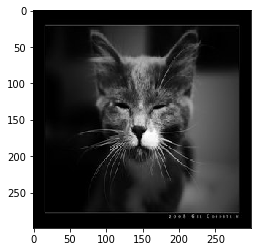

Predicted:  [('n02124075', 'Egyptian_cat', 0.5785853)]


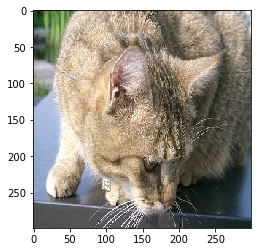

Predicted:  [('n02127052', 'lynx', 0.27343336)]


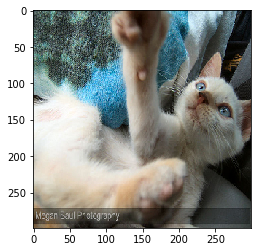

Predicted:  [('n02123394', 'Persian_cat', 0.55238426)]


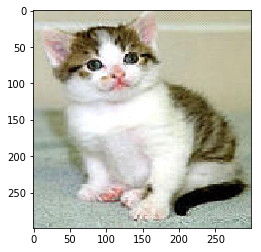

Predicted:  [('n02123045', 'tabby', 0.27875337)]


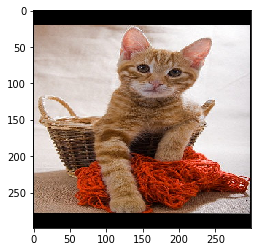

Predicted:  [('n02123045', 'tabby', 0.24650924)]


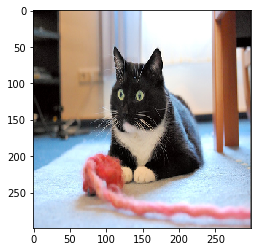

Predicted:  [('n02124075', 'Egyptian_cat', 0.21868062)]


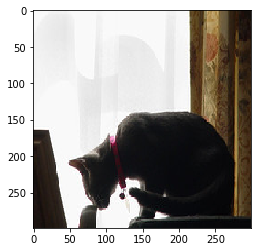

Predicted:  [('n02096585', 'Boston_bull', 0.12376153)]


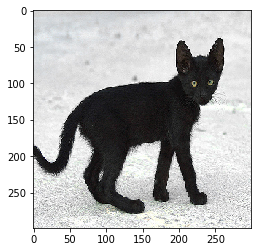

Predicted:  [('n02124075', 'Egyptian_cat', 0.59595364)]


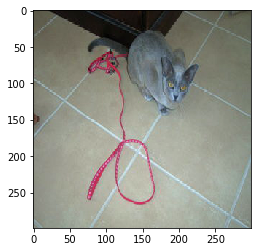

Predicted:  [('n02123597', 'Siamese_cat', 0.14436498)]


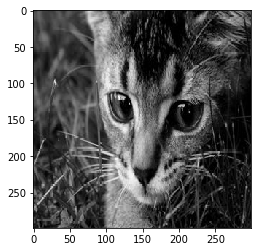

Predicted:  [('n02123045', 'tabby', 0.4741671)]


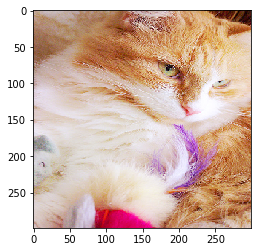

Predicted:  [('n03325584', 'feather_boa', 0.7241029)]


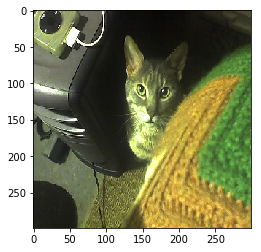

Predicted:  [('n03793489', 'mouse', 0.10129725)]


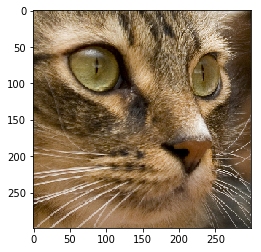

Predicted:  [('n02123045', 'tabby', 0.47728795)]


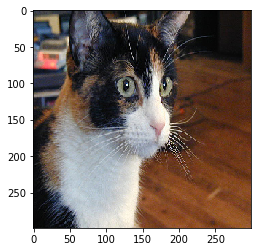

Predicted:  [('n02124075', 'Egyptian_cat', 0.20929356)]


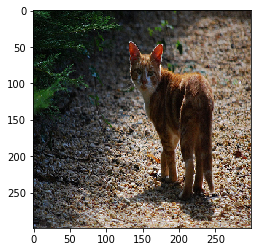

Predicted:  [('n02124075', 'Egyptian_cat', 0.23348328)]


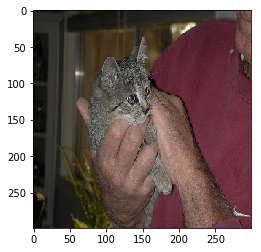

Predicted:  [('n02127052', 'lynx', 0.36272997)]


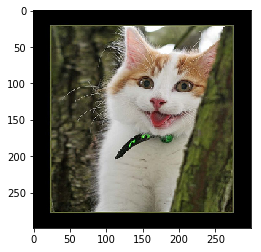

Predicted:  [('n02123159', 'tiger_cat', 0.22414273)]


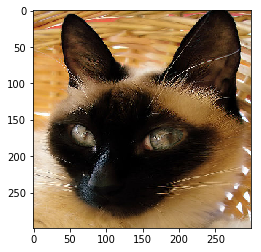

Predicted:  [('n02123597', 'Siamese_cat', 0.8566159)]


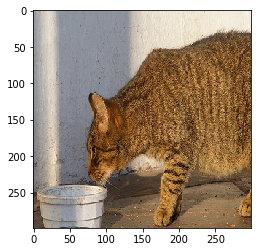

Predicted:  [('n02123159', 'tiger_cat', 0.5144727)]


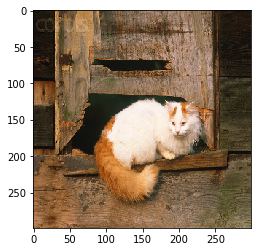

Predicted:  [('n02123159', 'tiger_cat', 0.15178996)]


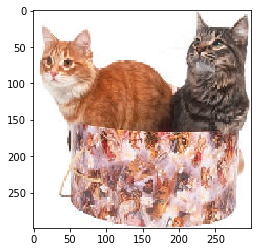

Predicted:  [('n02123045', 'tabby', 0.50066)]


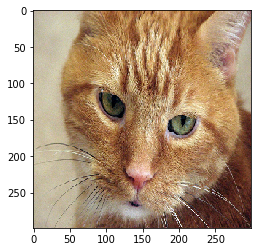

Predicted:  [('n02123159', 'tiger_cat', 0.4714365)]


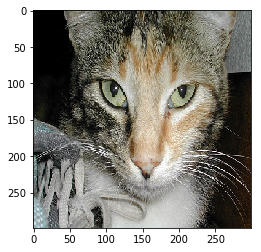

Predicted:  [('n02123045', 'tabby', 0.85876405)]


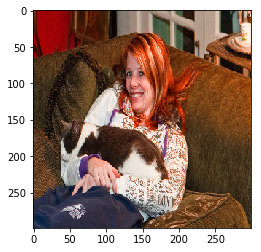

Predicted:  [('n02102040', 'English_springer', 0.30954763)]


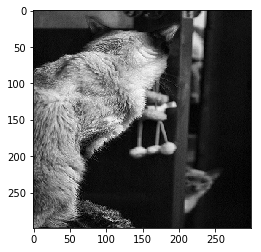

Predicted:  [('n02091467', 'Norwegian_elkhound', 0.61045086)]


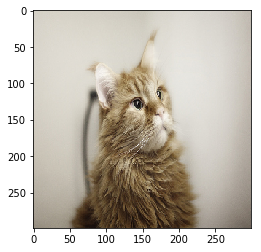

Predicted:  [('n02123394', 'Persian_cat', 0.27405706)]


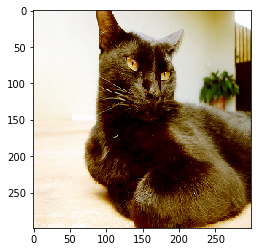

Predicted:  [('n02124075', 'Egyptian_cat', 0.50411296)]


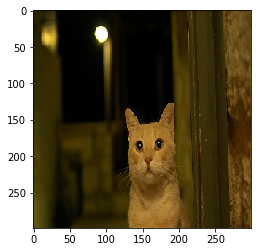

Predicted:  [('n02124075', 'Egyptian_cat', 0.8506861)]


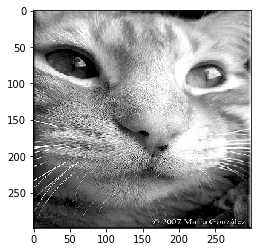

Predicted:  [('n02123045', 'tabby', 0.5928336)]


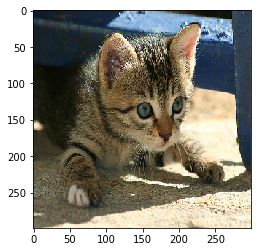

Predicted:  [('n02124075', 'Egyptian_cat', 0.5244479)]


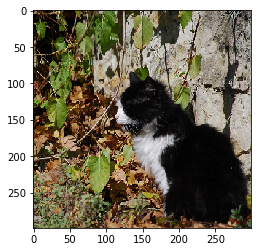

Predicted:  [('n02105855', 'Shetland_sheepdog', 0.1586849)]


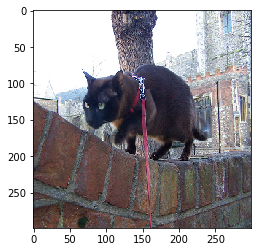

Predicted:  [('n02123597', 'Siamese_cat', 0.126105)]


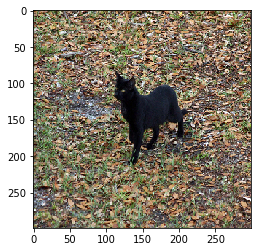

Predicted:  [('n02104365', 'schipperke', 0.6796321)]


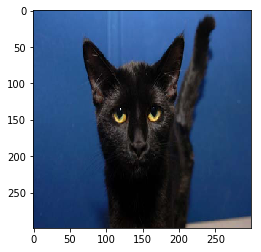

Predicted:  [('n02124075', 'Egyptian_cat', 0.8223105)]


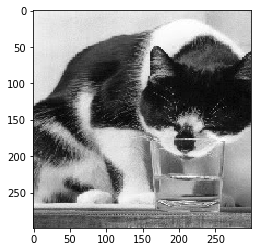

Predicted:  [('n04553703', 'washbasin', 0.09724526)]


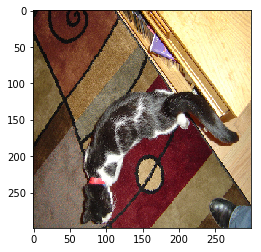

Predicted:  [('n03223299', 'doormat', 0.38344327)]


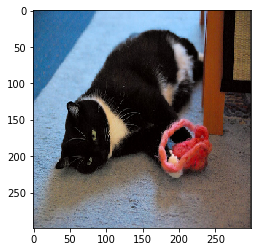

Predicted:  [('n02113023', 'Pembroke', 0.06799784)]


In [39]:
# time to see the network's class, description, and probability of each cat
Y = np.loadtxt('class_labels.csv')
preds = model.predict(X[0:,:,:,:])
predictions = decode_predictions(preds, top=1)
for i in range(len(Y)):
    if Y[i] == 1:
        plt.imshow(image.array_to_img(X[i,:,:,:]))
        plt.show()
        print('Predicted: ', predictions[i])

### Well.. It did pretty well. 27/37 cats successfully identified. It confused some of the cats as dogs and even a "doormat" once. To be fair, there is a doormat like rug in that photo. ☺